In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn import metrics

In [4]:
train = pd.read_excel('Data_Train.xlsx')
pd.set_option('display.max_columns', None)

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train.shape

(10683, 11)

In [7]:
tc = train.columns
print(f'No of columns : {len(tc)}')
print(f'Columns : \n {tc}')

No of columns : 11
Columns : 
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Duplicates:

In [10]:
train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


## Missing values:

In [11]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
train.dropna(inplace = True)

In [13]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA:

In [14]:
train['Journey_day'] = pd.to_datetime(train.Date_of_Journey, format = "%d/%m/%Y").dt.day              ## Got error for missing / before year.

In [15]:
train['Journey_month'] = pd.to_datetime(train.Date_of_Journey, format = "%d/%m/%Y").dt.month  

In [16]:
# train['Journey_year'] = pd.to_datetime(train.Date_of_Journey, format = "%d/%m/%Y").dt.year  

In [17]:
train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [18]:
# train['Journey_year'].value_counts()           ## This dataset contains only one year(2019) data alone. So, Year may not be required that much.

In [19]:
## since we got the seperate information date of journey, so this column is not needed now. We are droping this.

train.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [20]:
## Depature time is when a plane leaves the gate.
## Similar to Date_of_Journey we can extract values from Dep_Time

## Extracting Hours:
train['Dep_Hour'] = pd.to_datetime(train['Dep_Time']).dt.hour

## Extracting mins:
train['Dep_Min'] = pd.to_datetime(train['Dep_Time']).dt.minute

## Now we can drop the Dep_time Column
train.drop(['Dep_Time'], axis = 1, inplace = True)

In [21]:
train.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [22]:
## Same Process for the Arrival time:
## Arrival time is when the plane pulls up to the gate.

## Extract hours:
train['Arrival_Hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour

## Extract mins:
train['Arrival_Min'] = pd.to_datetime(train['Arrival_Time']).dt.minute

## Dropping the Arrival time:
train.drop(['Arrival_Time'], axis = 1, inplace = True)

In [23]:
train.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [24]:
## Time taken by the plane to reach the destination is the duration:
## And it also the difference btwn the dep_time and the arrival_time:

## Assinging and converting the duration column into list:
duration = list(train.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"     ## Add 0 mins
        else:
            duration[i] = "0h " + duration[i]                 ## Add 0 hs
            
duration_hrs = []
duration_mins = []
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep = "h")[0]) )         ## Extract hour from the time
    duration_mins.append(int(duration[i].split(sep = "m")[0].split( )[-1]))  ## Extracting min from the time

In [25]:
## Stroring them into new columns:

train['Duration_Hrs'] = duration_hrs
train['Duration_Mins'] = duration_mins

## Dropping the Duration col:
train.drop(['Duration'], axis = 1, inplace = True)

In [26]:
train.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


## Handling Categorical Data :

In [27]:
train['Airline'].value_counts()            ## This is Nominal data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

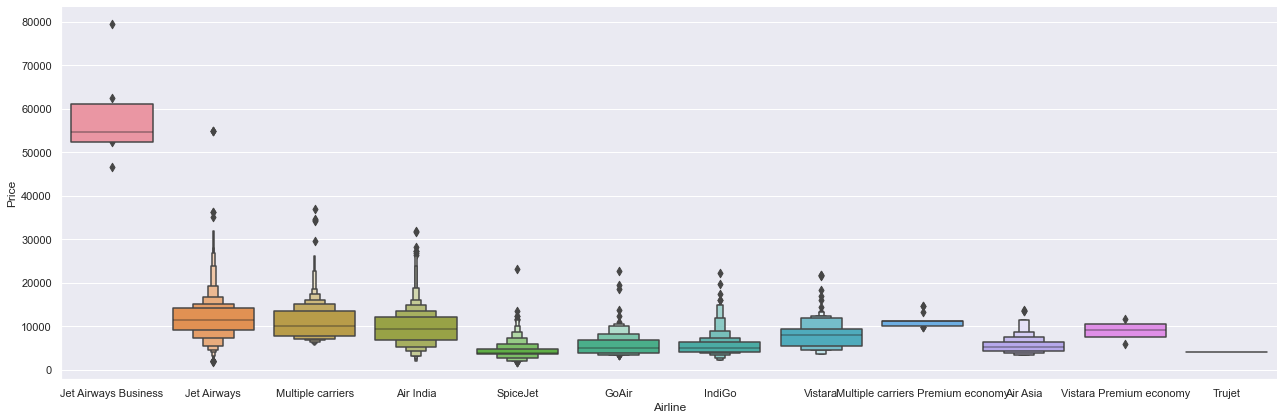

In [28]:
## Airline vs Price : 
sns.catplot(y = 'Price', x = 'Airline', data = train.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3 );

## From graph we can see that Jet Airways Bussiness have the Highest Price.
## Apart from the first Airline almost all are having similar median.
## Outlier - Jet Airways Business

In [29]:
## As norminal data we are going to OneHotEncoding : 

Airline = train[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
train['Source'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object>

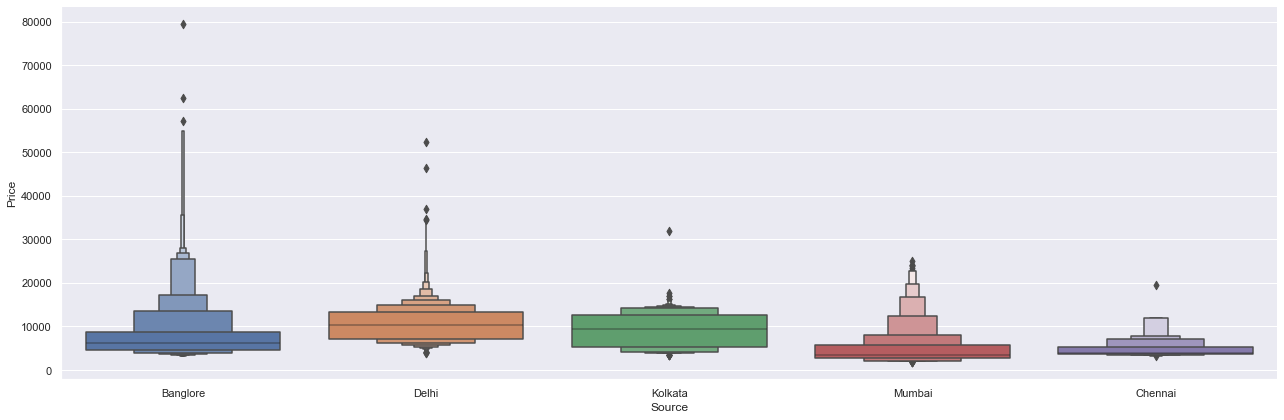

In [31]:
# sns.catplot(y = 'Price', x = 'Source', height = 6, aspect = 3, kind = 'boxen', data = train['Source'].sort_values('Price', ascending = False));    Error, Bcz I took series in the sort_values (train['Source']), I shhould take whole dataframe.
sns.catplot(y = 'Price', x = 'Source', height = 6, aspect = 3, kind = 'boxen', data = train.sort_values('Price', ascending = False));

In [32]:
## As Source is nominal data we will perform OHE:

# train[['Source']]   ## Gives the output with index.
# train['Source']      ## Gives only the values.

Source = train[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source .head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

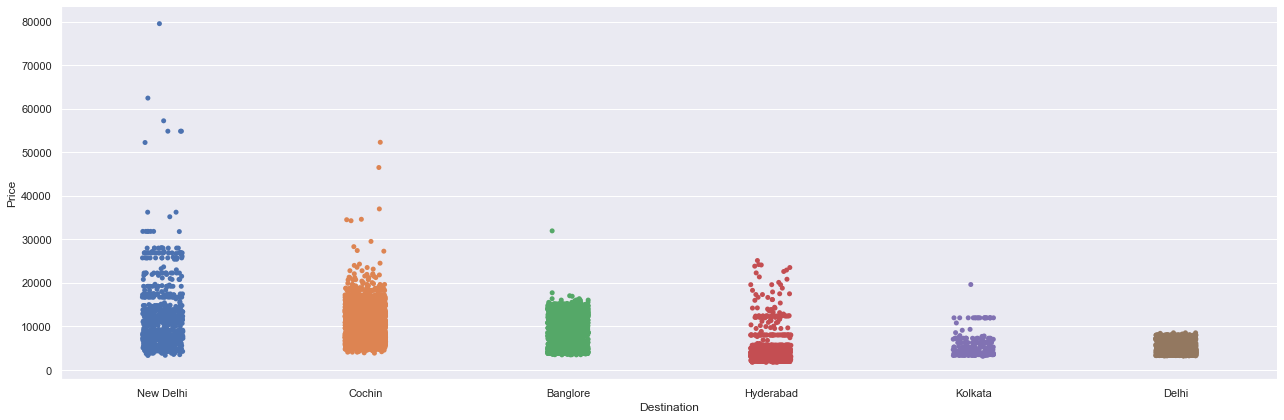

In [34]:
sns.catplot(y = "Price", x = "Destination", data = train.sort_values("Price", ascending = False), height = 6, aspect = 3);

In [35]:
## As Destination is also a nominal data, we are going to do OHE:

Destination = train[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
train['Total_Stops']                 ## Both Route and Total stops are doing the same thing. So we can drop any one.

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [38]:
train['Additional_Info'].value_counts()                                ## 80% of the Data is No info so we can drop this also.

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [39]:
train.drop(['Route', "Additional_Info"], axis = 1, inplace = True)

In [40]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [41]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
## This is an Ordinal data. So, Label Encoding :

train.replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace = True)

In [43]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [44]:
## Concate dataframe and all Encooding columns:

In [45]:
data_train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [46]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
data_train.shape

(10682, 33)

In [48]:
## Dropping the old categorical data which we encoded:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [49]:
data_train.head(1)

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Test data :

In [50]:
test = pd.read_excel('Test_set.xlsx')

In [51]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## PRE PROCESSING

In [52]:
## We are going to do all the same pre processing steps that are don for the train data : 
## Why we didn't combine test and train to perform PP ?
                    ## Bcz of Data Leakage.
## So, We can Copy all the step from above and Let them to perform in one Stage:


print(test.shape)
print(test.info)
print(test.describe)

## Missing values:
print(test.isnull().sum())
test.dropna(inplace = True)

## Pre-Processing:

## Seperating  
## Date of Journey :
test['Journey_day'] = pd.to_datetime(test.Date_of_Journey, format = "%d/%m/%Y").dt.day
test['Journey_month'] = pd.to_datetime(test.Date_of_Journey, format = "%d/%m/%Y").dt.month
# test['Journey_year'] = pd.to_datetime(test.Date_of_Journey, format = "%d/%m/%Y").dt.year
test.drop('Date_of_Journey', axis = 1, inplace = True)

## Depature time:
test['Dep_Hour'] = pd.to_datetime(test["Dep_Time"]).dt.hour
test['Dep_Min'] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(['Dep_Time'], axis = 1, inplace = True)

## Arrival Time:
test['Arrival_Hour'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_Min'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop(['Arrival_Time'], axis = 1, inplace = True)

## Duration:
duration = list(test.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:                             ## Got error bcz didn't put the index [] here
            duration[i] = duration[i].strip() + " 0m"    ## Add 0 mins
        else:
            duration[i] = "0h " + duration[i]
            
## Creating new list:
duration_hrs = []
duration_mins = []
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep = 'h')[0]))                       ## Getting hr alone
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split( )[-1]))      ## Getting min alone
    
test['Duration_Hrs'] = duration_hrs
test['Duration_Mins'] = duration_mins

## Dropping Duration
test.drop(['Duration'], axis = 1, inplace = True)
print(f'After Duration : \n {test.head(1)}')

## HANDLING  CATEGORICAL  DATA:
## Airline, Source & Destination are Nominal data. So, we are going to do One Hot Enoding.

## Airline:
Airline = test[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
print(f'Airline : \n {Airline}')

## Source:
Source = test[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
print(f'Source : {Source}')

## Destination:
Destination = test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
print(f'Destionation : {Destination}')

## Route and Total Stops gives the same we are going to drop any one,
## 80% of the Additional info gives no info. So, We are gonna drop this col also here.
test.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

## Total_Stop is a Ordinal data. So, we are going to do Label Encoding:
test.replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace = True)
print(f'After LE : \n {test.head()}')
## Concate all the data:
data_test = pd.concat([test, Airline, Source, Destination], axis = 1)

## Dropping the extra data from the dataframe:
data_test.drop(["Airline", "Source","Destination"], axis = 1, inplace = True)

print(f'Final : \n {data_test.head(1)}')

(2671, 10)
<bound method DataFrame.info of                 Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20        

In [53]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection : 

In [54]:
data_train.shape

(10682, 30)

In [55]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hrs',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [56]:
X = data_train.drop(['Price'], axis =1)
y = data_train['Price']

In [57]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

#### Correlation:

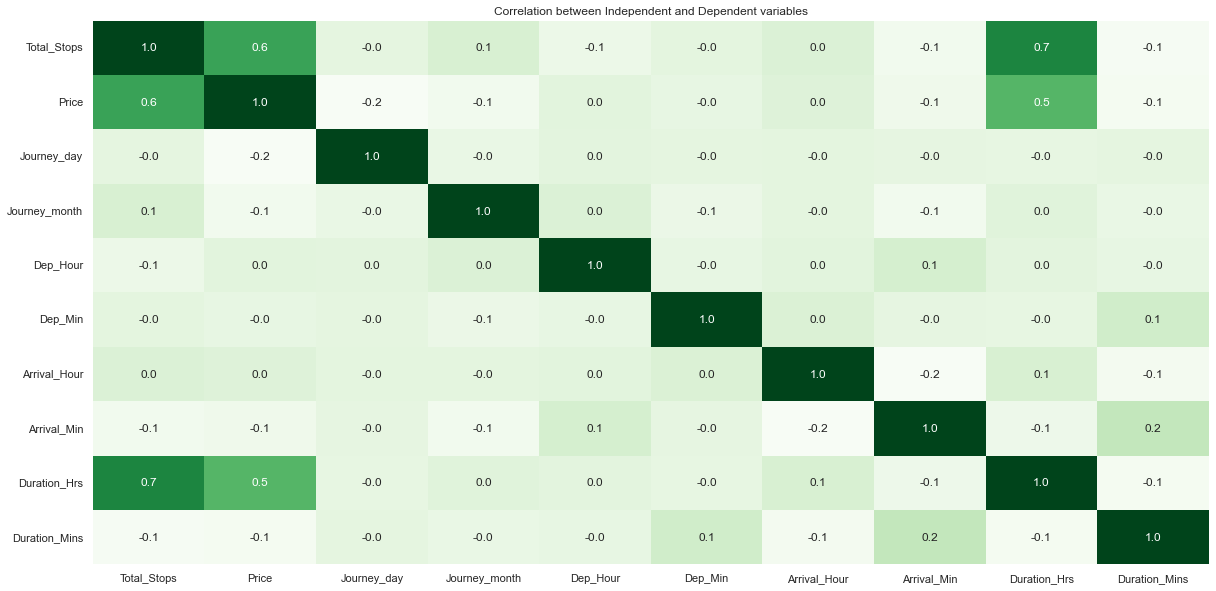

In [59]:
plt.figure(figsize = (20,10))
# sns.set_title('')
corr = train.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True, fmt = '.1f', cbar = False).set(title = "Correlation between Independent and Dependent variables");

In [60]:
## Import feature using ExtraTreeRegressor:

from sklearn.ensemble import ExtraTreesRegressor as etr
selection = etr()
selection.fit(X, y)

ExtraTreesRegressor()

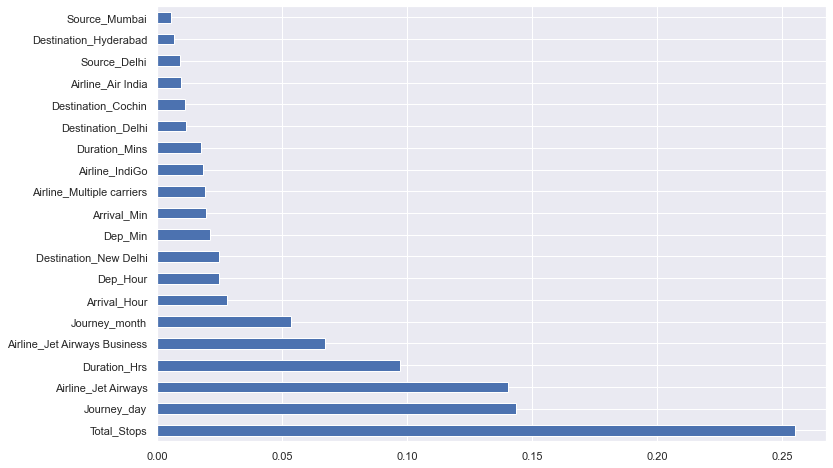

In [61]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh');

## Fitting model to Random Forest:

In [62]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = 2)

In [63]:
from sklearn.ensemble import RandomForestRegressor as rfr
reg_rf = rfr()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

##### For Train data:

In [65]:
y_pred = reg_rf.predict(X_train)

In [66]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9549909884550124
Adjusted R^2: 0.9548376988091164
MAE: 568.8153409446476
MSE: 945755.1782438877
RMSE: 972.4994489684237


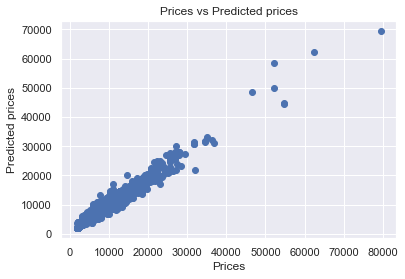

In [67]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

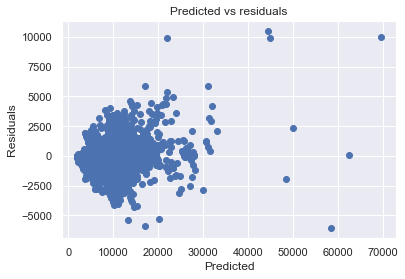

In [68]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### For Test data:

In [69]:
y_test_pred = reg_rf.predict(X_test)

In [70]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7793140414069096
Adjusted R^2: 0.7762765982179207
MAE: 1193.991250889081
MSE: 4908742.9683218505
RMSE: 2215.568317231913


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


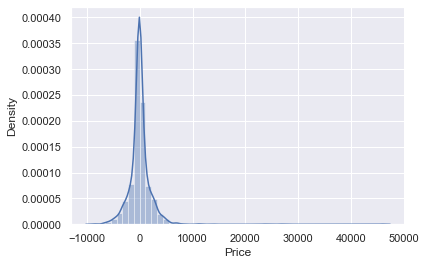

In [71]:
sns.distplot(y_test - y_test_pred);

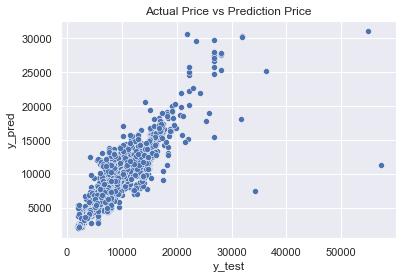

In [72]:
sns.scatterplot(x = y_test, y = y_test_pred,)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Actual Price vs Prediction Price');

In [74]:
metrics.r2_score(y_test, y_test_pred)    ## 0.7770079

0.7793140414069096

## Hyperparameter Tunning:

In [75]:
from sklearn.model_selection import RandomizedSearchCV as rscv

In [76]:
## RSCV

## Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
## Number of featutes to consider at every split
max_features = ['auto', 'sqrt']
## Max num of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
## Min num of samples required to split a node
min_samples_split = [2,5,10,15,100]
## Min num of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [77]:
## Create the random Grid

random_grid = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth': max_depth, 
              'min_samples_split': min_samples_split, 
              'min_samples_leaf': min_samples_leaf}

In [78]:
## Random search of parameter, using 5 fold cross validation, 
## search across 100 different combinations
rf_random = rscv(estimator = reg_rf, param_distributions = random_grid,  scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 2, n_jobs = 1)

In [79]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=  20.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=  21.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=  21.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=  21.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=  20.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  34.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  38.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [80]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [92]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, n_estimators=900)

In [81]:
prediction = rf_random.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


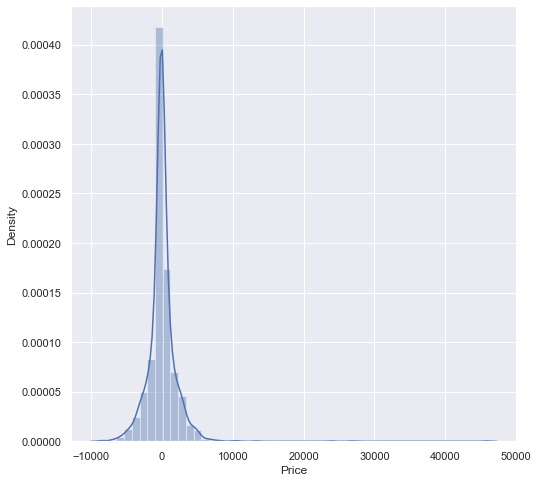

In [82]:
plt.figure(figsize = (8,8))
sns.distplot(y_test - prediction);

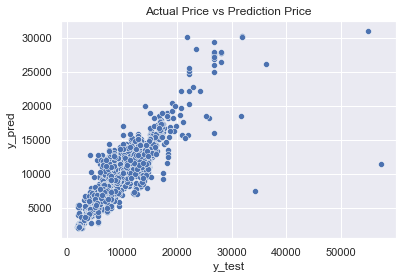

In [83]:
sns.scatterplot(x = y_test, y = prediction,)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Actual Price vs Prediction Price');

In [84]:
mae = metrics.mean_absolute_error(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = np.sqrt(metrics.mean_absolute_error(y_test, prediction))
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

MAE :  1192.9428681242498
MSE :  4879025.473857874
RMSE :  34.53900502510531


In [85]:
metrics.r2_score(y_test, prediction) 

0.7806500726057503

## Pickling :

In [86]:
import pickle as pkl

In [87]:
## Open a file where you want to store the data:
file = open('Flight_rf.pkl', 'wb')

## dump into that file
pkl.dump(rf_random, file)

In [88]:
model  = open('Flight_rf.pkl', 'rb')
forest = pkl.load(model)

In [89]:
y_prediction = forest.predict(X_test)

In [90]:
metrics.r2_score(y_test, y_prediction)

0.7806500726057503